### Финальная работа "Метрики, гипотезы, точки роста"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Загрузим датасет для анализа - это база заказов онлайн магазина из Великобритании
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\dop material\\OnlineRetail.csv', sep=',', na_values='?')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


### Предположения о бизнес-задаче.
С помощью этих данных можно:
* проанализировать развитие магазина за год в динамике (здесь дек 2010 - дек 2011), 
* формировать ассортимент и заполнять склад наиболее востребованными товарами, 
* продумать акции/скидки для непродающихся товаров,
* узнать, какие клиенты/страны приносят больший доход, 
* мониторить retention — то есть количество повторных покупок,
* устанавливать минимальную стоимость заказа на доставку исходя из среднего чека,
* анализировать возвраты/отказы (причины и меры).

Соответственно, пользователями отчета могут быть: директор, отдел продаж, логистика/закупки, маркетинг.

In [3]:
# Исследуем датасет на предмет качества, достаточности данных.
# посмотрим основную информацию по датасету.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54079 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [4]:
# Найдем пропуски в данных.
# Видим, что есть немного пропусков в названии товара и отсутствует 25% CustomerID - 
# видимо были покупки от незарегистрированных клиентов.
(df.isna().mean() * 100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.25
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.03
Country         0.00
dtype: float64

In [5]:
# InvoiceDate - нужно привести к формату datetime, иначе не сможем анализировать периоды,
# у UnitPrice тип данных - обьект, а не число, нужно привести к числу для дальнейших расчетов, 
# а CustomerID - приведем к обьекту.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['UnitPrice'].replace(',', '.', regex=True, inplace=True)
df['UnitPrice'] = df.UnitPrice.astype('float64')

df['CustomerID'] = df.CustomerID.astype('object')

In [6]:
# теперь с датасетом можно работать
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54214 non-null  object        
 1   StockCode    54214 non-null  object        
 2   Description  54079 non-null  object        
 3   Quantity     54214 non-null  int64         
 4   InvoiceDate  54214 non-null  datetime64[ns]
 5   UnitPrice    54214 non-null  float64       
 6   CustomerID   40643 non-null  object        
 7   Country      54214 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.3+ MB


In [7]:
# добавим столбец с суммой продажи
df['Summa'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Summa
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850,United Kingdom,22.00


In [8]:
# добавим столбец date с месяцем и годом продажи
df['date'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y/%m')) 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Summa,date
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010/12
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010/12
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047,United Kingdom,17.85,2010/12
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85,2010/12
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850,United Kingdom,22.00,2010/12


In [9]:
# Посмотрим базовые статистики по датафрейму
df.describe()

,Quantity,UnitPrice,Summa
count,54214.000000,54214.000000,54214.000000
mean,9.610802,4.307341,18.447189
std,57.358422,47.834496,83.326884
min,-9600.000000,0.000000,-6930.000000
25%,1.000000,1.250000,3.480000
50%,3.000000,2.080000,9.840000
75%,10.000000,4.130000,17.400000
max,2400.000000,6930.000000,4121.640000


### Наблюдения
* Видим, что у нас всего 54214 строк в отчете.
* Максимальное кол-во продаж одного кода в одном заказе - 2400 шт, максимальный возврат товара - 9600 шт (отмена заказа).
* В среднем продается 9,6 штук одного кода/заказ.
* Максимальная цена - 6930 фунтов, максимальная сумма - 4121,64 фунтов.
* Среднее значение цены - 4,31 фунтов, суммы - 18,45 фунтов.

In [10]:
# сделаем сводную таблицу по клиентам / CustomerID
# В этом отчете интересно посмотреть на тех, кто покупает больше всего. 
df_id = df.pivot_table(index=['CustomerID', 'Country'], values=['Quantity', 'Summa'], aggfunc='sum')
df_id.head()

,,Quantity,Summa
CustomerID,Country,,
12347.0,Iceland,161,271.79
12348.0,Finland,144,163.20
12349.0,Italy,83,106.84
12350.0,Norway,36,49.80
12352.0,Norway,26,184.40


In [11]:
# Для этого посчитаем топ-10 клиентов по сумме покупок
# Далее — отделу продаж взять всех, кто покупает много и регулярно на особый контроль: 
# надо смотреть, как у них дела (динамика), общаться и создавать для них максимальные блага.
df_id_sum = df_id.sort_values(by='Summa', ascending=False)
df_id_sum.head(10)

,,Quantity,Summa
CustomerID,Country,,
18102.0,United Kingdom,6587,26533.44
14646.0,Netherlands,20332,25312.76
17450.0,United Kingdom,7278,18233.46
12415.0,Australia,9536,16030.81
14911.0,EIRE,8296,14674.63
17949.0,United Kingdom,5528,12048.08
14156.0,EIRE,4727,11775.91
17511.0,United Kingdom,6685,8961.03
14096.0,United Kingdom,1839,7974.99


In [12]:
# Сделаем сводную таблицу по товарам и посмотрим Топ-10 по кол-ву продаж (штуки).
# Особенно интересно этот отчет смотреть в динамике — кто добавился в топ, а кто вылетел.
df_code = df.pivot_table(index=['StockCode', 'Description'], columns='date', values='Quantity', aggfunc='sum', margins=True, fill_value=0)
df_code.sort_values(by='All', ascending=False).head(10)

,date,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,All
StockCode,Description,,,,,,,,,,,,,,
All,,33324,30782,29938,36681,28079,36918,30470,40079,43180,54849,54126,80110,24576,523112
85099B,JUMBO BAG RED RETROSPOT,325,189,453,390,476,481,639,409,698,62,623,288,81,5114
21212,PACK OF 72 RETROSPOT CAKE CASES,730,155,109,400,275,1422,55,545,466,373,288,182,98,5098
84879,ASSORTED COLOUR BIRD ORNAMENT,544,44,104,114,133,237,80,136,453,458,528,1422,177,4430
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,62,147,336,672,722,288,528,48,240,192,591,258,144,4228
21915,RED HARMONICA IN BOX,59,26,27,48,12,24,265,74,808,66,286,2139,0,3834
85123A,WHITE HANGING HEART T-LIGHT HOLDER,282,228,231,73,190,473,208,738,142,229,229,332,27,3382
15036,ASSORTED COLOURS SILK FAN,16,-486,1305,40,68,195,1045,758,28,37,61,84,26,3177
16014,SMALL CHINESE STYLE SCISSOR,4,10,1500,0,0,1,0,20,10,1020,0,510,0,3075


In [13]:
# Посмотрим так же Топ-10 товаров по сумме продаж (фунты стерлингов).
# Еще интересно обратить внимание в данном отчете на товары, которые находятся в топе по кол-ву, но их нет в топе по выручке. 
# С такими товарами стоит отдельно поработать. Возможно, допустимо повысить на них цену?
df_code_sum = df.pivot_table(index=['StockCode', 'Description'], values='Summa', aggfunc='sum')
df_code_sum.sort_values(by='Summa', ascending=False).head(10)

,,Summa
StockCode,Description,
DOT,DOTCOM POSTAGE,20607.25
22423,REGENCY CAKESTAND 3 TIER,16219.40
85099B,JUMBO BAG RED RETROSPOT,10060.83
85123A,WHITE HANGING HEART T-LIGHT HOLDER,9498.22
84879,ASSORTED COLOUR BIRD ORNAMENT,6946.86
POST,POSTAGE,6946.14
47566,PARTY BUNTING,6872.06
22086,PAPER CHAIN KIT 50'S CHRISTMAS,5714.65
79321,CHILLI LIGHTS,5501.53


In [38]:
# Cделаем сводную таблицу по месяцам продаж
df_month = df.pivot_table(index='date', values=['Quantity', 'Summa'], aggfunc='sum', margins=False)
df_month.sort_values(by='date', ascending=True).head(14)

,Quantity,Summa
date,,
2010/12,32763,76439.740
2011/01,30550,64125.780
2011/02,29635,47766.840
2011/03,36588,73452.620
2011/04,27810,49826.890
2011/05,36699,68884.000
2011/06,30307,76033.760
2011/07,39451,73621.980
2011/08,43304,65897.260


<AxesSubplot:title={'center':'Динамика продаж по месяцам'}, xlabel='date', ylabel='Summa'>

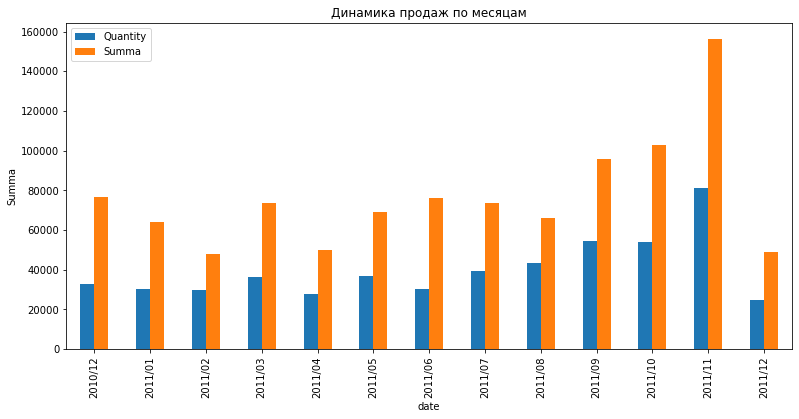

In [39]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

# С помощью визуализации можем анализировать динамику продаж. 
# Столбчатая диаграмма показывает, например, пиковый рост продаж в ноябре. 
# Здесь можно анализировать дальше: что было сделано для этого? или это случайный разовый рост?
df_month.plot(kind='bar', 
            title='Динамика продаж по месяцам',
            xlabel='date',
            ylabel='Summa')

In [16]:
# Сделаем сводную таблицу по странам покупателей.
# Далее можно проанализировать насколько нам выгодно (или нет) доставлять в определенные страны (при наличии данных по расходам)
df_country = df.pivot_table(index='Country', values='InvoiceNo', aggfunc='count')
df_country.sort_values(by='InvoiceNo', ascending=False).head(10)

,InvoiceNo
Country,
United Kingdom,49602
Germany,951
France,881
EIRE,787
Spain,253
Netherlands,234
Belgium,211
Switzerland,189
Portugal,152


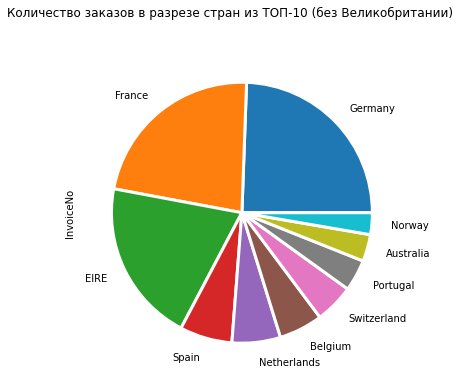

In [17]:
# Круговая диаграмма - Количество заказов в разрезе стран из ТОП-10, чтобы сконцентрироваться на промо и логистике для этих стран. 
# без Великобритании, так как она занимает лидируещее место с большим отрывом.
pie_data = df_country.InvoiceNo.sort_values(ascending = False).iloc[1:11]
ax = pie_data.plot(kind='pie',
                   title='Количество заказов в разрезе стран из ТОП-10 (без Великобритании)',
                   labeldistance=1.15, 
                   subplots=True,
                   wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

In [18]:
# Сделаем сводную таблицу по отдельным заказам
df_invoice = df.pivot_table(index='InvoiceNo', values=['Quantity', 'Summa'], aggfunc='sum')
df_invoice.sort_values(by='Summa', ascending=False).head(10)

,Quantity,Summa
InvoiceNo,,
574941,1839,7657.35
576365,1950,6808.90
558526,2232,5682.00
548203,1089,4350.37
540689,1284,4121.64
541220,956,4054.20
581457,1022,3995.06
581115,1404,3861.00
561633,768,3686.40


In [19]:
# Посчитаем средний чек
# Видим, что в среднем заказе - 35 шт на сумму 67 фунтов.
df_invoice.describe()

,Quantity,Summa
count,14877.000000,14877.000000
mean,35.023190,67.224299
std,128.897456,218.366087
min,-9600.000000,-6930.000000
25%,6.000000,15.000000
50%,16.000000,33.000000
75%,37.000000,67.500000
max,3076.000000,7657.350000


In [20]:
# Можем посчитать также моду на кол-во штук в чеке (самое часто встречающееся значение)
df_invoice['Quantity'].round().mode()[0]

12

In [21]:
# Построим сводную таблицу динамики продаж по странам (по кол-ву заказов)
df_dynamics = df.pivot_table(index='date', columns='Country', values='InvoiceNo', aggfunc='count', margins=False, fill_value=0)
df_dynamics.head(14)

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
date,,,,,,,,,,,,,,,,,,,,,
2010/12,4,1,0,11,0,0,3,9,0,3,...,9,0,0,9,8,7,0,0,4012,0
2011/01,16,0,0,1,0,0,5,1,0,0,...,13,0,6,41,2,17,0,0,3225,0
2011/02,8,3,0,13,0,0,3,16,1,1,...,5,0,0,7,2,8,0,3,2593,0
2011/03,14,0,0,20,0,1,17,10,0,1,...,11,0,0,25,5,5,0,0,3354,0
2011/04,0,4,0,14,3,0,4,0,0,0,...,8,0,6,5,2,9,4,0,2788,2
2011/05,9,8,1,15,0,0,5,0,0,3,...,8,0,0,9,3,14,0,0,3337,6
2011/06,21,0,0,23,0,6,11,6,0,9,...,5,0,0,17,4,14,0,0,3278,0
2011/07,17,7,0,14,0,6,0,0,0,1,...,9,0,8,21,8,14,0,0,3582,14
2011/08,15,12,0,27,0,0,12,0,0,0,...,3,0,0,29,0,33,0,0,3181,3


<AxesSubplot:title={'center':'Динамика продаж по странам'}, xlabel='Период', ylabel='Продажи'>

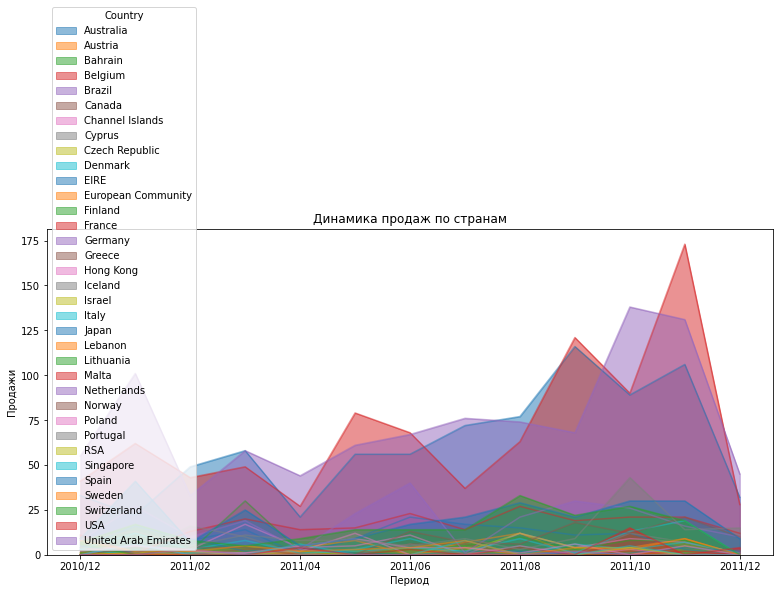

In [22]:
# Можно визуализировать динамику продаж по месяцам в разрезе стран (без Великобритании и незарегистрированных клиентов).
# Но получается непоказательно, так как много стран и распределение заказов неравномерное.
df_dynamics.drop(['United Kingdom', 'Unspecified'], axis=1).plot(kind='area',
                stacked=False,
                title='Динамика продаж по странам', 
                xlabel='Период', 
                ylabel='Продажи')

<AxesSubplot:xlabel='date'>

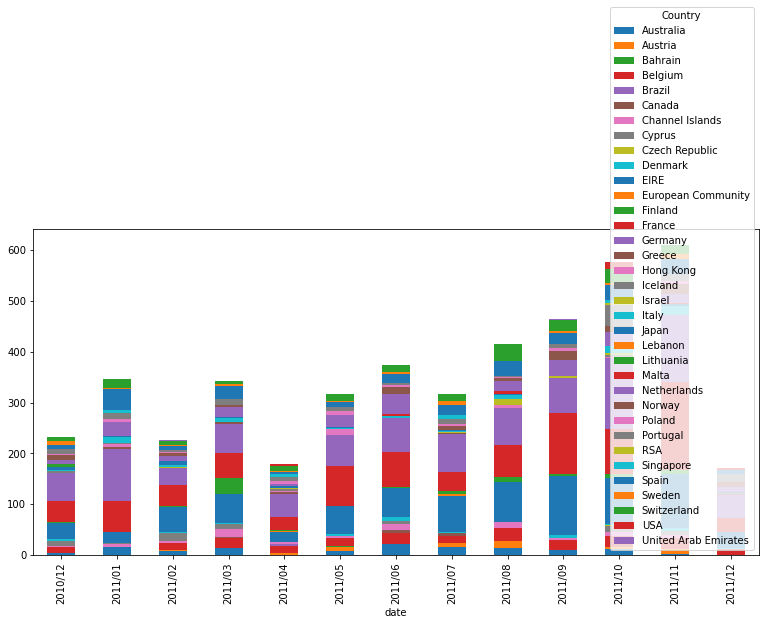

In [23]:
# Столбчатая диаграмма с накоплением - тоже не очень выглядит.
df_dynamics.drop(['United Kingdom', 'Unspecified'], axis=1).plot(kind='bar', stacked=True)

Text(0, 0.5, 'Продажи')

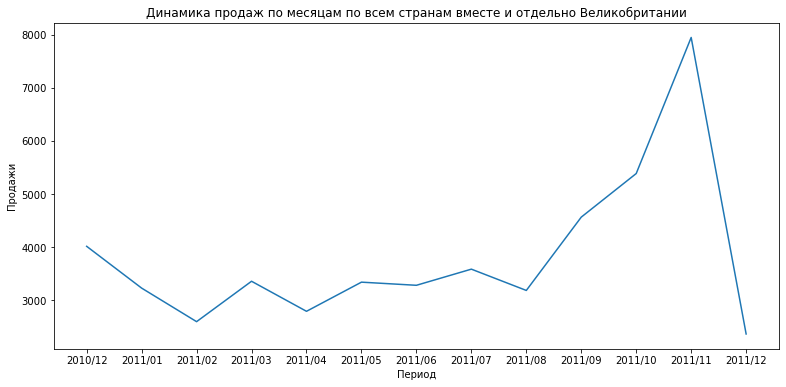

In [24]:
# Поэтому посмотрим на динамику Великобритании, так как это домашний и самый покупающий регион.
# На графике заметен пик продаж в ноябре и падение в декабре, можно проанализировать причины, за счет чего, прогнозы и ожидания.
plt.plot(df_dynamics.index, df_dynamics['United Kingdom'])
plt.title('Динамика продаж по месяцам по всем странам вместе и отдельно Великобритании')
plt.xlabel('Период')
plt.ylabel('Продажи')

In [46]:
# Здесь посмотрим на возвращающихся клиентов. 
df_clients = df.pivot_table(index='CustomerID', values='InvoiceNo', aggfunc='count')
df_retention = df_clients[df_clients.InvoiceNo > 3].sort_values(by='InvoiceNo', ascending=False).reset_index()
df_retention.head()

,CustomerID,InvoiceNo
0,17841.0,771
1,14911.0,563
2,14096.0,546
3,12748.0,447
4,14606.0,278


In [45]:
# Всего клиентов (зарегистрированных)
len(df.CustomerID.unique())

3820

In [49]:
# Видим, что возвращающихся клиентов - 63% - 2386 из 3820.
print(df_retention.CustomerID.count())

print(df_retention.CustomerID.count() / len(df.CustomerID.unique()))

2386
0.624607329842932


In [50]:
# Признак здорового бизнеса — когда процент повторных клиентов растет.
# Посмотрим retention в динамике по месяцам. 
df_retention_month = df.pivot_table(index='CustomerID', columns='date', values='InvoiceNo', aggfunc='count', margins=True, fill_value=0)
df_retention_month[df_retention_month.All > 3].tail()

date,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,2011/11,2011/12,All
CustomerID,,,,,,,,,,,,,,
18265.0,0,0,0,0,0,0,0,2,0,2,0,0,0,4
18272.0,0,0,0,0,3,0,0,2,0,0,1,0,0,6
18283.0,0,10,2,0,5,5,12,2,0,3,4,25,2,70
18287.0,0,0,0,0,0,4,0,0,0,0,2,0,0,6
All,2692,2221,2053,2771,2250,2875,2753,2682,2846,4106,4958,6670,1766,40643


<AxesSubplot:title={'center':'Platforms by Global Sales'}, xlabel='date', ylabel='Sales'>

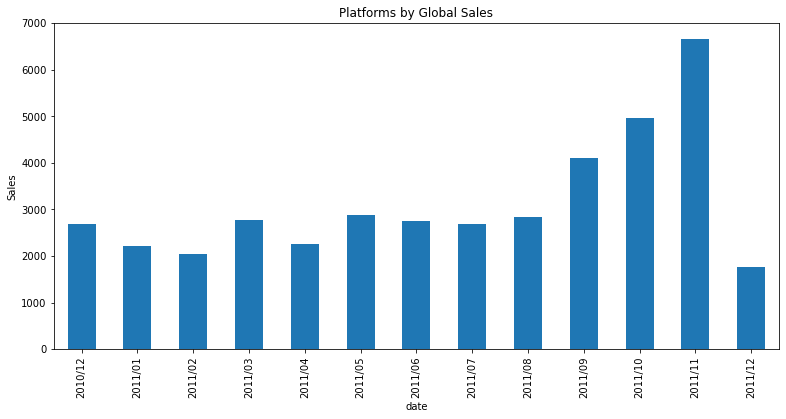

In [51]:
# Для наглядности визуализируем динамику повторных покупок по месяцам
df_retention_month.loc['All'].drop(['All'], axis=0).plot(kind='bar', 
                                title='Platforms by Global Sales',
                                xlabel='date',
                                ylabel='Sales')

### Заключение.
Этот датасет можно вертеть до бесконечности, раскладывая на метрики и периоды, анализируя зависимости показателей и динамику.
Но уже сейчас по итогам проведенного анализа можно судить о "случайности происходящего" в продажах, то есть нет планомерного роста продаж, роста повторных покупок, нет стратегии развития. 

Целью развития текущего бизнеса для руководства должно стать - поиск точек роста и формулирование гипотез:
* гипотеза привлечения новых клиентов (виральности в т.ч.), 
* гипотеза удержания (роста повторных покупок), 
* управленченская гипотеза - фокусировать команду на рост ключевых метрик (выручки, кол-ва заказов, кол-во новых клиентов).


In [34]:
df.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\dataset.csv', sep = ',')

In [35]:
df_id_sum.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\top_clients.csv', sep = ',')

In [36]:
df_code_sum.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\top_code.csv', sep = ',')

In [37]:
df_month.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\month_dynamic.csv', sep = ',')

In [40]:
df_country.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\country.csv', sep = ',')

In [41]:
df_invoice.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\invoice.csv', sep = ',')

In [42]:
df_dynamics.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\country_dynamic.csv', sep = ',')

In [43]:
df_retention.to_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Metrics\\finalwork\\retention.csv', sep = ',')